In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input


Load Dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')


In [3]:
#Mengubah Bentuk Data

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0



X_train dan X_test diubah menjadi bentuk (jumlah_sampel, 100, 100, 3), yang berarti setiap gambar memiliki ukuran 100x100 piksel dengan 3 saluran warna (RGB).

Y_train dan Y_test diubah menjadi bentuk (jumlah_sampel, 1), yang mungkin menunjukkan label kategori untuk setiap gambar (misalnya, satu label per gambar).

Normalisasi Data
Anda menormalkan nilai piksel gambar dengan membaginya dengan 255.0:

Normalisasi: Ini mengubah rentang nilai piksel dari [0, 255] menjadi [0, 1], yang membantu dalam proses pelatihan model karena sering kali mempercepat konvergensi dan meningkatkan kinerja model.


In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


Penjelasan

X_train: (2000, 100, 100, 3)
Ini menunjukkan bahwa Anda memiliki 2000 gambar dalam set pelatihan, setiap gambar berukuran 100x100 piksel dengan 3 saluran warna (RGB).

Y_train: (2000, 1)
Ini menunjukkan bahwa Anda memiliki 2000 label yang sesuai dengan gambar dalam X_train. Bentuk (2000, 1) menunjukkan bahwa setiap label adalah sebuah vektor kolom, yang umum untuk tugas klasifikasi.

X_test: (400, 100, 100, 3)
Ini menunjukkan bahwa Anda memiliki 400 gambar dalam set pengujian, setiap gambar berukuran 100x100 piksel dengan 3 saluran warna (RGB).

Y_test: (400, 1)
Ini menunjukkan bahwa Anda memiliki 400 label yang sesuai dengan gambar dalam X_test, dengan bentuk (400, 1).


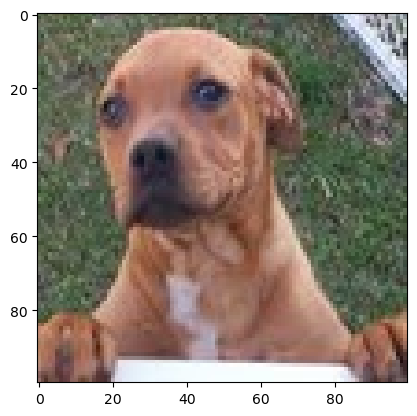

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Kode ini menampilkan gambar acak dari dataset X_train. Fungsi random.randint() 
digunakan untuk memilih indeks acak dari data pelatihan, lalu gambar yang sesuai dengan indeks tersebut divisualisasikan menggunakan
plt.imshow() dari matplotlib. 
Dari gambar yang terlihat, sedang melatih model untuk mengenali gambar anjing.

Modeling

In [7]:
model = Sequential([
    Input(shape=(100, 100, 3)),    # Definisikan bentuk input di sini
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


Input Layer:
Menyatakan bentuk input data, yaitu gambar berukuran 100x100 piksel dengan 3 saluran warna (RGB).

Convolutional Layers:
Layer konvolusi ini menggunakan kernel 3x3 untuk mendeteksi fitur dari gambar. Kedua layer konvolusi ini masing-masing memiliki 32 filter.

MaxPooling Layers:
Layer max pooling ini mengurangi dimensi spatial dari data dengan mengambil nilai maksimum dari area 2x2 pada gambar.

Flatten Layer:
Mengubah data 2D dari layer konvolusi menjadi 1D untuk bisa diteruskan ke layer dense.

Dense Layers:
Layer dense ini sepenuhnya terhubung dan menghasilkan output akhir. Di sini, layer terakhir memiliki satu neuron dengan aktivasi sigmoid, yang cocok untuk tugas klasifikasi biner.



In [8]:
# Definisikan model menggunakan Sequential dan Input
model = Sequential([
    Input(shape=(100, 100, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


Input Layer:
Menyatakan bentuk input data gambar, yaitu gambar berukuran 100x100 piksel dengan 3 saluran warna (RGB).

Convolutional Layers:
Conv2D: Lapisan konvolusi dengan 32 filter, ukuran kernel 3x3, dan fungsi aktivasi relu. Lapisan ini akan mengidentifikasi fitur dari gambar.

MaxPooling Layers:
MaxPooling2D: Lapisan pooling dengan ukuran pool 2x2, yang akan mengurangi dimensi spatial dari gambar dengan mengambil nilai maksimum dari area 2x2. Ini membantu mengurangi kompleksitas dan mencegah overfitting.

Flatten Layer:
Flatten: Mengubah data dari bentuk 2D menjadi 1D sebelum memasukkannya ke dalam lapisan dense.

Dense Layers:
Dense(64, activation='relu'): Lapisan fully connected dengan 64 neuron dan fungsi aktivasi relu, yang membantu model belajar representasi non-linear.
Dense(1, activation='sigmoid'): Lapisan output dengan satu neuron dan fungsi aktivasi sigmoid, cocok untuk klasifikasi biner (misalnya, "ya" atau "tidak").


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

perintah model.compile yang Anda gunakan sangat penting untuk menyiapkan model sebelum melatihnya. 
Penjelasan Parameter

loss='binary_crossentropy':
Fungsi Loss: binary_crossentropy adalah fungsi loss yang umum digunakan untuk masalah klasifikasi biner. Fungsi ini mengukur seberapa baik model memprediksi dua kelas (misalnya, 0 dan 1). Ini adalah pilihan yang tepat jika tugas Anda adalah klasifikasi biner.

optimizer='adam':
Optimizer: adam adalah optimizer yang sangat populer dan efisien dalam mengoptimalkan pembelajaran model. Adam (Adaptive Moment Estimation) menggabungkan keuntungan dari dua algoritma optimisasi lainnya: AdaGrad dan RMSProp. Ini secara otomatis menyesuaikan learning rate selama pelatihan, yang sering kali membantu model belajar lebih baik.

metrics=['accuracy']:
Metrik: accuracy adalah metrik yang digunakan untuk mengevaluasi kinerja model selama pelatihan dan evaluasi. Ini menunjukkan proporsi prediksi yang benar dari total prediksi. Untuk klasifikasi biner, akurasi adalah metrik yang umum digunakan.

In [10]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.5225 - loss: 0.7370
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6285 - loss: 0.6622
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.6504 - loss: 0.6235
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7302 - loss: 0.5559
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7157 - loss: 0.5493


Output dari pelatihan model Anda menunjukkan bagaimana akurasi dan loss berubah selama pelatihan

Observasi:

Peningkatan Akurasi: Akurasi meningkat pesat dari 52,25% menjadi 73,02% pada epoch ke-4, menunjukkan bahwa model semakin baik dalam mempelajari data.

Tren Kerugian: Kerugian menurun secara konsisten, menunjukkan bahwa model semakin baik dalam memprediksi.
Peningkatan akurasi yang konsisten dan penurunan kehilangan menunjukkan bahwa model Anda belajar dengan efektif

In [11]:
model.evaluate(X_test, Y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7037 - loss: 0.5638


[0.5827345848083496, 0.6924999952316284]

Analisis: 

Perbandingan Kerugian:
Kerugian Pelatihan/Validasi vs. Kerugian Uji: Kerugian pada data pelatihan atau validasi (0.5827) lebih rendah dibandingkan dengan kerugian pada data uji (0.6925). Ini mengindikasikan bahwa model mungkin mengalami sedikit overfitting, yaitu model terlalu cocok dengan data pelatihan dan mungkin tidak menggeneralisasi dengan baik pada data uji.

Akurasi vs. Kerugian:
Akurasi yang cukup baik (70,37%) menunjukkan bahwa model cukup efektif dalam mengklasifikasikan data uji. Namun, kerugian yang relatif tinggi menunjukkan bahwa ada beberapa kesalahan prediksi yang masih signifikan, yang dapat menjadi area perbaikan.

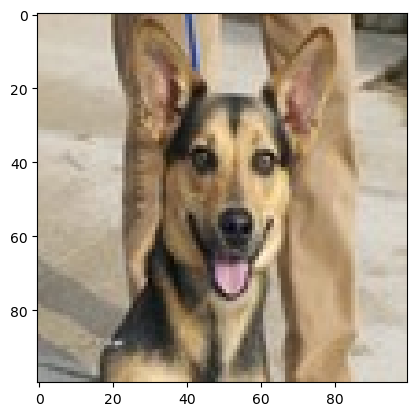

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Our model says it is a : dog


In [28]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


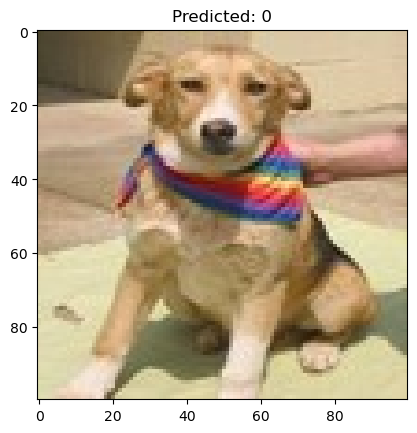

Our model says it is a : dog


In [68]:
idx2 = 2 

plt.imshow(X_test[idx2])
plt.title(f"Predicted: {model.predict(X_test[idx2].reshape(1, 100, 100, 3)).argmax(axis=-1)[0]}")
plt.show()


true_label = Y_test[idx2]  
print(f"Our model says it is a : {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


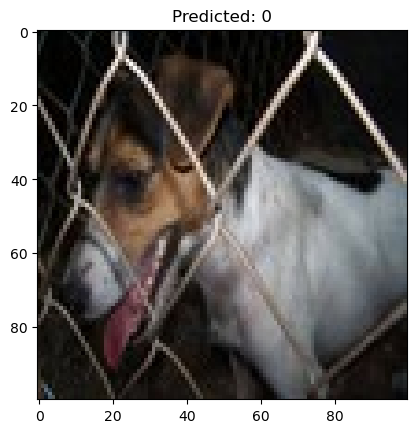

Our model says it is a : dog


In [69]:
idx2 = 3 


plt.imshow(X_test[idx2])
plt.title(f"Predicted: {model.predict(X_test[idx2].reshape(1, 100, 100, 3)).argmax(axis=-1)[0]}")
plt.show()


true_label = Y_test[idx2]  
print(f"Our model says it is a : {pred}")
